<a href="https://colab.research.google.com/github/GiovanniTurra/QuantumBact/blob/main/QuantumBact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install lmfit numpy matplotlib pandas

In [2]:
from lmfit import Minimizer, Parameters, report_fit
import numpy as np
import matplotlib.pylab as plt
from pandas import read_csv, DataFrame

In [3]:
df = read_csv("prova.csv")
t = df.t.values
N_rand = df.A.values

np.random.seed(1234) #Set random seed for reproducibility

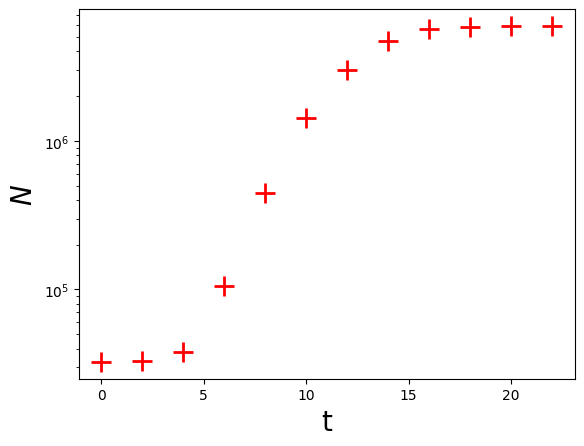

In [4]:
plt.plot(t, N_rand, 'r+', markersize = 15, markeredgewidth = 2, label = 'Data')
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$N$', fontsize = 20)
plt.ticklabel_format(style='scientific', scilimits=[0,3])
plt.yscale('log')
plt.show()

In [5]:
#Create object for parameter storing
params_gompertz = Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
params_gompertz.add_many(('N_0', np.log(N_rand)[0] , True, 0, None, None, None),
                         ('N_max', np.log(N_rand)[-1], True, 0, None, None, None),
                         ('r_max', 0.62, True, None, None, None, None),
                         ('t_lag', 5, True, 0, None, None, None))

In [6]:
#Write down the objective function that we want to minimize, i.e., the residuals
def residuals_gompertz(params, t, data):
    '''Model a logistic growth and subtract data'''
    #Get an ordered dictionary of parameter values
    v = params.valuesdict()
    #Logistic model
    model = v['N_0'] + (v['N_max'] - v['N_0']) * np.exp(-np.exp(v['r_max'] * np.exp(1) * (v['t_lag'] - t) / ((v['N_max'] - v['N_0']) * np.log(10)) + 1))
    #Return residuals
    return model - data

In [7]:
#Create a Minimizer object
minner = Minimizer(residuals_gompertz, params_gompertz, fcn_args=(t, np.log(N_rand)))
#Perform the minimization
fit_gompertz = minner.minimize()

In [14]:
#Sumarize results
report_fit(fit_gompertz)
#how to extrapolate a b c
# a = N_max - N_0
# c = r_max * e / a
# b = t_lag * c - 1

a = fit_gompertz.uvars["N_max"].nominal_value - fit_gompertz.uvars["N_0"].nominal_value
c = fit_gompertz.uvars["r_max"].nominal_value * np.exp(1) / a
b = fit_gompertz.uvars["t_lag"].nominal_value * c - 1

print('a = {} - b = {} - c = {}'.format(a, b, c))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 12
    # variables        = 4
    chi-square         = 0.01216123
    reduced chi-square = 0.00152015
    Akaike info crit   = -74.7329033
    Bayesian info crit = -72.7932767
[[Variables]]
    N_0:    10.3873113 +/- 0.02587304 (0.25%) (init = 10.389)
    N_max:  15.6567148 +/- 0.02206541 (0.14%) (init = 15.59722)
    r_max:  1.74047222 +/- 0.03212443 (1.85%) (init = 0.62)
    t_lag:  4.51885626 +/- 0.08094460 (1.79%) (init = 5)
[[Correlations]] (unreported correlations are < 0.100)
    C(r_max, t_lag) = +0.7573
    C(N_0, t_lag)   = +0.5819
    C(N_max, r_max) = -0.4662
    C(N_max, t_lag) = -0.3182
    C(N_0, N_max)   = -0.1325
    C(N_0, r_max)   = +0.1152
a = 5.26940348600454 - b = 3.0572208606677007 - c = 0.8978424246201939


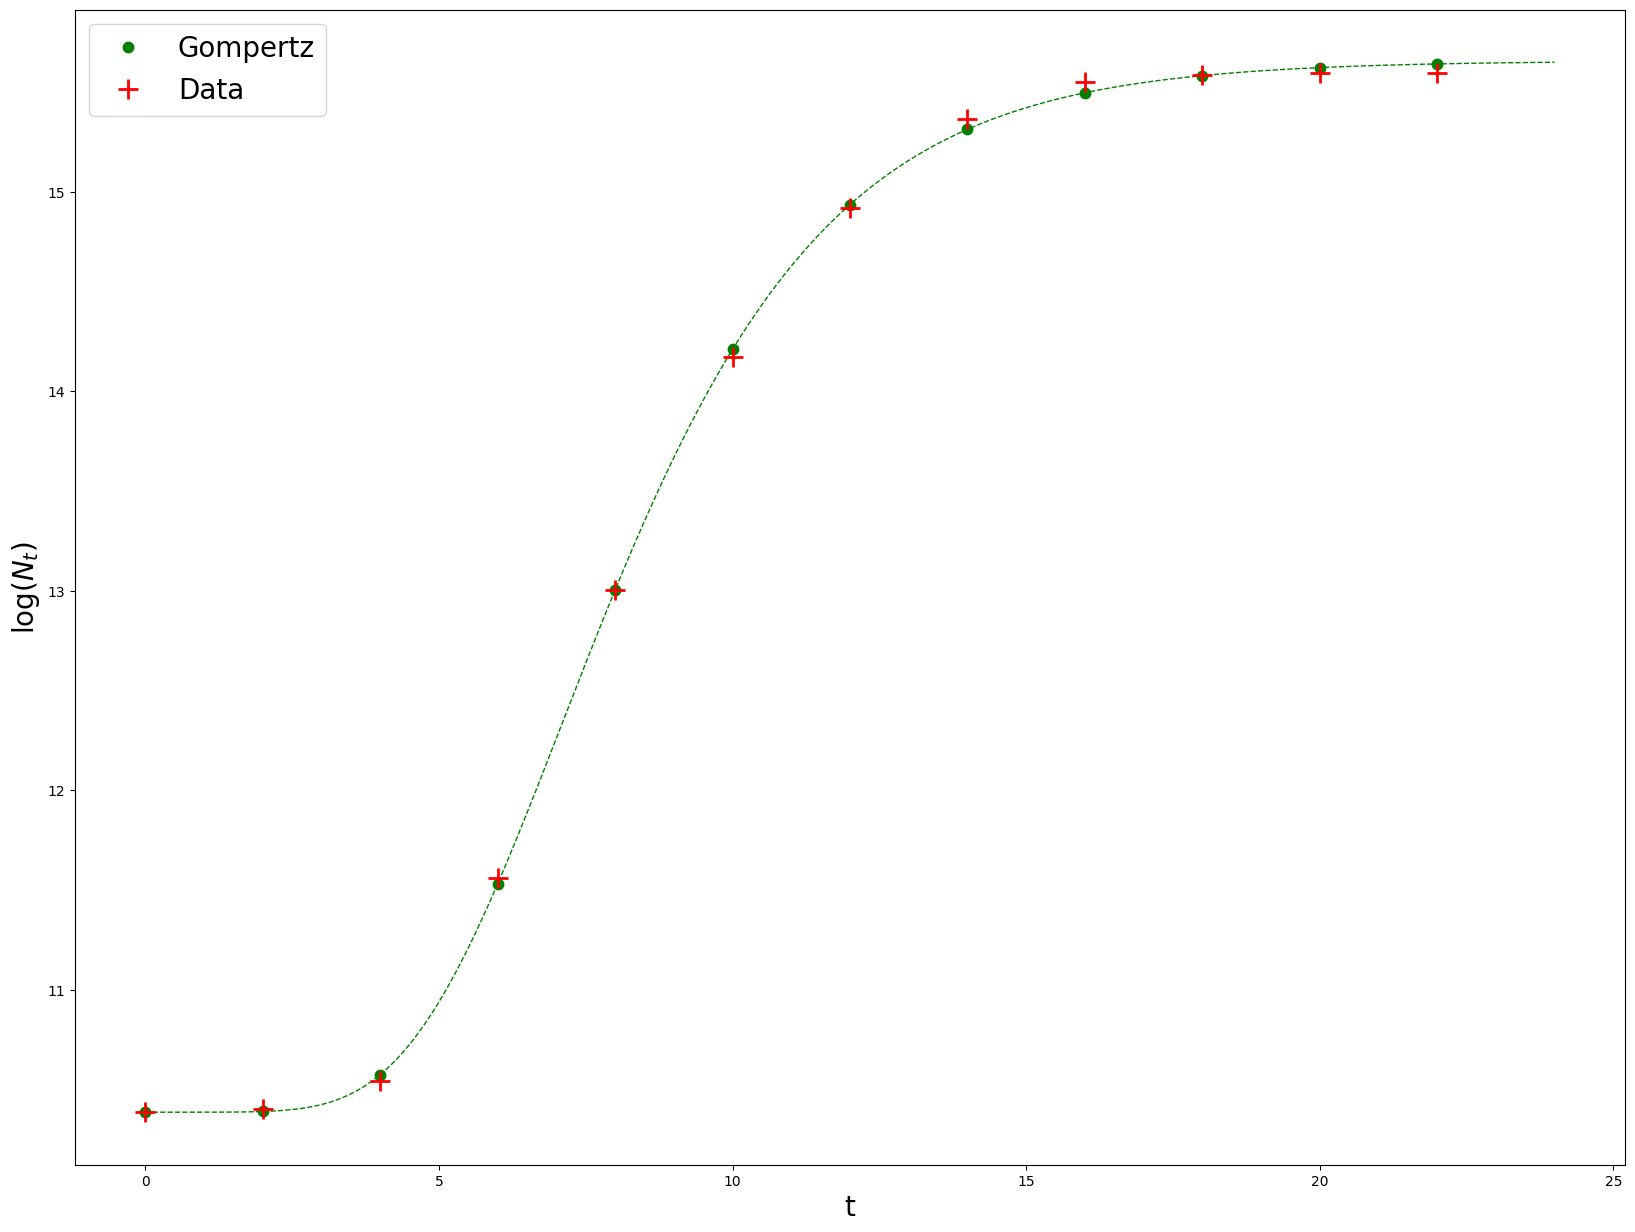

In [9]:
plt.rcParams['figure.figsize'] = [20, 15]

#Gompertz
result_gompertz = np.log(N_rand) + fit_gompertz.residual
plt.plot(t, result_gompertz, 'g.', markersize = 15, label = 'Gompertz')
#Get a smooth curve by plugging a time vector to the fitted logistic model
t_vec = np.linspace(0,24,1000)
log_N_vec = np.ones(len(t_vec))
residual_smooth_gompertz = residuals_gompertz(fit_gompertz.params, t_vec, log_N_vec)
plt.plot(t_vec, residual_smooth_gompertz + log_N_vec, 'green', linestyle = '--', linewidth = 1)

#Plot data points
plt.plot(t, np.log(N_rand), 'r+', markersize = 15,markeredgewidth = 2, label = 'Data')
#Plot legend
plt.legend(fontsize = 20)
plt.xlabel('t', fontsize = 20)
plt.ylabel(r'$\log(N_t)$', fontsize = 20)
plt.ticklabel_format(style='scientific', scilimits=[0,3])

plt.show()